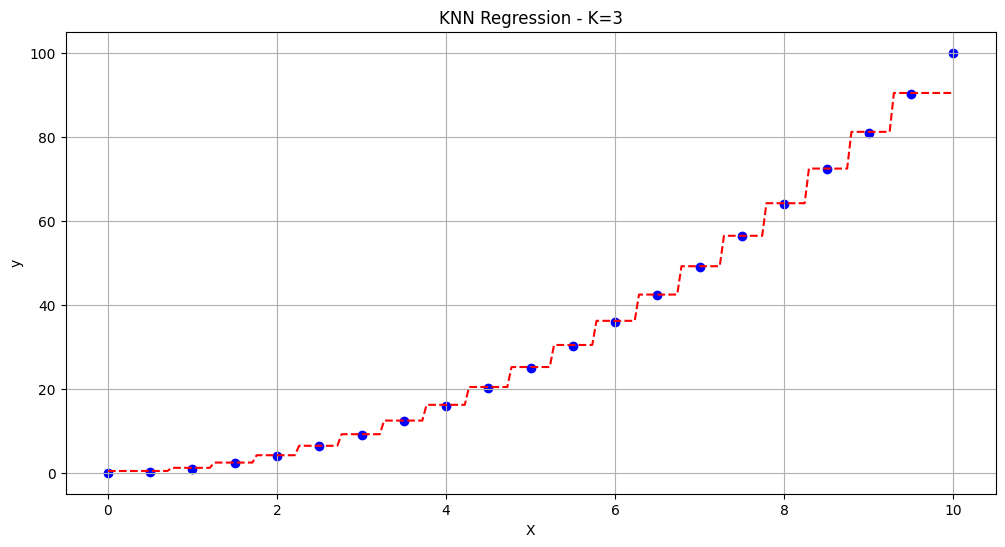

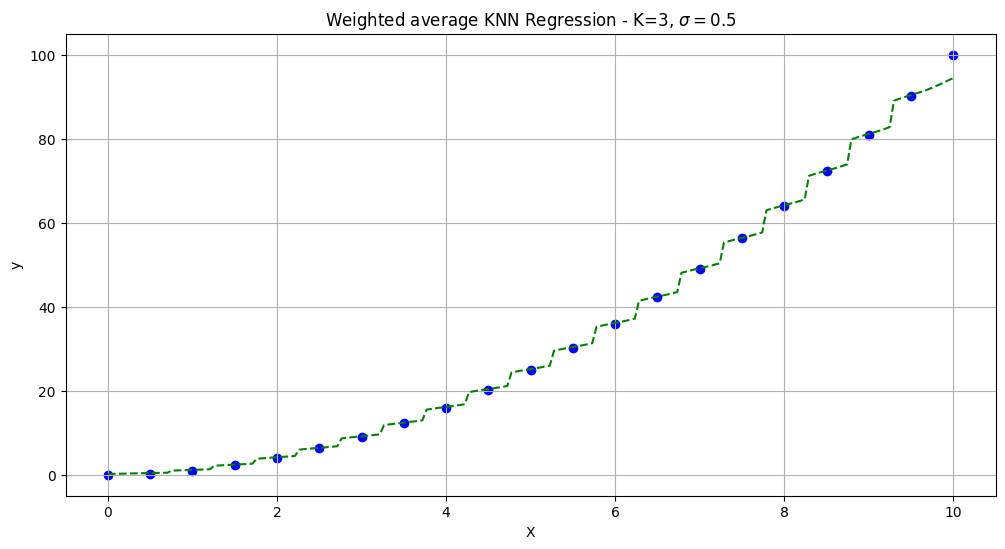

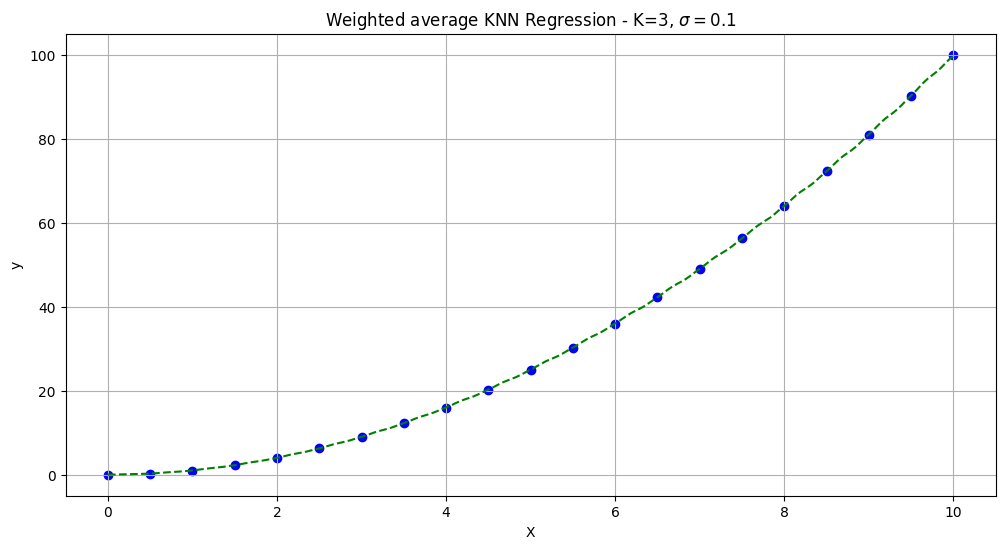

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
                    5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
y_data = x_data**2
X_fit = np.linspace(0, 10, 200)

def knn(xi, x, y, K=3):
    distances = np.abs(x - xi)**2
    nearest_indices = np.argsort(distances)[:K]
    return np.mean(y[nearest_indices])

def weighted_average_knn(xi, x, y, K=3, sigma=0.5):
    distances = np.abs(x - xi)**2
    nearest_indices = np.argsort(distances)[:K]
    w = np.exp(-distances[nearest_indices]**2 / (2 * sigma**2))
    return np.sum(w * y[nearest_indices]) / np.sum(w) if np.sum(w) > 0 else 0

y_fit_knn = np.array([knn(x, x_data, y_data, K=3) for x in X_fit])
y_fit_weighted_average_knn_0_5 = np.array([weighted_average_knn(x, x_data, y_data, K=3, sigma=0.5) for x in X_fit])
y_fit_weighted_average_knn_0_1 = np.array([weighted_average_knn(x, x_data, y_data, K=3, sigma=0.1) for x in X_fit])

plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, color='blue')
plt.plot(X_fit, y_fit_knn, color='red', linestyle='--')
plt.title("KNN Regression - K=3")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, color='blue')
plt.plot(X_fit, y_fit_weighted_average_knn_0_5, color='green', linestyle='--')
plt.title(r"Weighted average KNN Regression - K=3, $\sigma=0.5$")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, color='blue')
plt.plot(X_fit, y_fit_weighted_average_knn_0_1, color='green', linestyle='--')
plt.title(r"Weighted average KNN Regression - K=3, $\sigma=0.1$")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()